#### [Chapter 17](https://github.com/Ziaeemehr/mndynamics/blob/main/mndynamics/examples/Chap_17.ipynb)
<!-- - [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Ziaeemehr/mndynamics/main?labpath=mndynamics%2Fexamples%2FChap_17.ipynb) -->

**Frequency-Current Curves**

- Börgers, C., 2017. An introduction to modeling neuronal dynamics (Vol. 66). Berlin: Springer.

Code by : Abolfazl Ziaeemehr ([GitHub](https://github.com/Ziaeemehr))

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from mndynamics.models.py.HH_Base import HH_F_I_CURVE

In [2]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['figure.figsize'] = [7, 5]

In [3]:
obj = HH_F_I_CURVE({'t_end':3000, 'dt':0.05})
obj()

F-I Curve Hudgkin Huxley Model


{'c': 1.0,
 'g_k': 36.0,
 'g_na': 120.0,
 'g_l': 0.3,
 'v_k': -82.0,
 'v_na': 45.0,
 'v_l': -59.0,
 'v_thr': -20.0,
 'i_ext': 7.0,
 't_end': 3000,
 'v0': -70.0,
 'dt': 0.05}

In [4]:
vec_i_ext = np.linspace(3, 13, 23)
data = obj.simulate_F_I(vec_i_ext)

I =     3.000, f =      0.00
I =     3.455, f =      0.00
I =     3.909, f =      0.00
I =     4.364, f =      0.00
I =     4.818, f =      0.00
I =     5.273, f =      0.00
I =     5.727, f =      0.00
I =     6.182, f =      0.00
I =     6.636, f =      0.00
I =     7.091, f =      0.00
I =     7.545, f =      0.00
I =     8.000, f =      0.00
I =     8.455, f =      0.00
I =     8.909, f =      0.00
I =     9.364, f =      0.00
I =     9.818, f =     68.36, t =        267.565489
I =    10.273, f =     69.12, t =         54.382958
I =    10.727, f =     70.48, t =         55.503363
I =    11.182, f =     71.46, t =         53.436262
I =    11.636, f =     72.53, t =         49.917553
I =    12.091, f =     73.70, t =         46.665361
I =    12.545, f =     74.42, t =         45.112065
I =    13.000, f =     75.20, t =         46.665323
I =    13.000, f =     75.21, t =         41.823534
I =    12.545, f =     74.41, t =         48.736602
I =    12.091, f =     73.17, t =         51.

In [5]:
# data

In [6]:
np.savez("data.npz",
         forward=data['forward'],
         backward=data['backward'],
         i_ext=data['i_ext'])
data = np.load("data.npz")

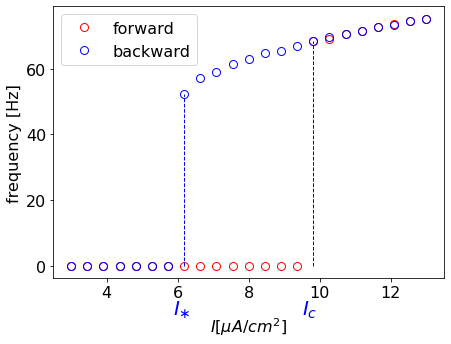

In [7]:
obj.plot_F_I(data);